In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/boardgame-recommender/data/user_ratings.csv')
df = df[['Username','BGGId','Rating']]
df.head()

,Username,BGGId,Rating
0,Tonydorrf,213788,8.0
1,tachyon14k,213788,8.0
2,Ungotter,213788,8.0
3,brainlocki3,213788,8.0
4,PPMP,213788,8.0


In [6]:
df['Username'] = df['Username'].astype(str)
df['BGGId'] = df['BGGId'].astype(int)
df['Rating'] = df['Rating'].astype('float32')

In [48]:
user_ids = df['Username'].unique().tolist()
game_ids = df['BGGId'].unique().tolist()

In [49]:
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i,x in enumerate(user_ids)}

In [50]:
game2game_encoded = {x: i for i,x in enumerate(game_ids)}
game_encoded2game = {i:x for i,x in enumerate(game_ids)}

In [57]:
num_users = len(user2user_encoded)
num_games = len(game_encoded2game)

In [63]:
df['user'] = df['Username'].map(user2user_encoded)
df['game'] = df['BGGId'].map(game2game_encoded)
df['Rating'] = df['Rating'].values.astype(np.float32)

In [64]:
min_rating = min(df['Rating'])
max_rating = max(df['Rating'])
X = df[['user','game']].values
y = df['Rating'].apply(lambda x: (x - min_rating)/(max_rating-min_rating)).values

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [87]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

In [95]:
# game_input = Input(shape=[1], name='Game-input')
# game_embedding = Embedding(n_games+1, 50, name='Game-Embedding')(game_input)
# game_vec = Flatten(name='Game-Flatten')(game_embedding)

# user_input = Input(shape=[1], name='User-Input')
# user_embedding = Embedding(n_users+1, 50, name='User-Embedding')(user_input)
# user_vec = Flatten(name='User-Flatten')(user_embedding)

# conc = Concatenate()([user_vec, game_vec])
# fc1 = Dense(256, activation='relu')(conc)
# fc2 = Dense(128, activation='relu')(fc1)
# fc3 = Dense(128, activation='relu')(fc2)
# out = Dense(1)(fc3)

# model = Model([user_input, game_input], out)
# model.compile('adam','mean_squared_error')

In [19]:
n_users = len(df['Username'].unique())
n_games = len(df['BGGId'].unique())
# train, test = train_test_split(df, test_size=0.2)

In [80]:
user_input

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'User-Input')>

In [105]:
embeddings_size = 50

user_input = Input(name='User-Input', shape=(1,))
user_embedding = Embedding(name='User-Embedding', input_dim=n_users, output_dim=embeddings_size)(user_input)
user_vec = Flatten(name='Reshaped-User')(user_embedding)

game_input = Input(name='Game-Input', shape=(1))
game_embedding = Embedding(name='Game-Embedding', input_dim = n_games, output_dim = embeddings_size)(game_input)
game_vec = Flatten(name='Reshaped-Game')(game_embedding)

prod = Dot(name='Dot-Product',normalize=True, axes=1)([user_vec, game_vec])

y_out = Dense(name='y-out', units=1, activation='linear')(prod)

model = Model(inputs=[user_input, game_input], outputs=y_out)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Game-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 50)        20568750    ['User-Input[0][0]']             
                                                                                                  
 Game-Embedding (Embedding)     (None, 1, 50)        1096250     ['Game-Input[0][0]']             
                                                                                           

In [106]:
history = model.fit(x=[x_train[:,0], x_train[:,1]], y=y_train, epochs=3, batch_size = 5000, verbose=True)

Epoch 1/3
3031/3031 [==============================] - 717s 236ms/step - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 2/3
3031/3031 [==============================] - 733s 242ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 3/3
3031/3031 [==============================] - 726s 240ms/step - loss: 0.0112 - mean_squared_error: 0.0112


Text(0.5, 0, 'epoch')

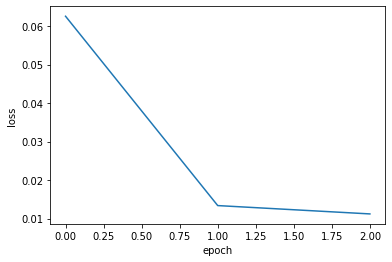

In [107]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [108]:
y_pred = model.predict(x=[x_test[:,0], x_test[:,1]])

118389/118389 [==============================] - 84s 708us/step


In [109]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.12080647988435084